In [46]:
%matplotlib inline

from pathlib import Path

import math
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools, stattools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics import tsaplots

In [47]:
cadhrs = pd.read_csv('CanadianWorkHours.csv')

In [48]:
cadhrs.head()

,Year,Hours
0,1966,37.2
1,1967,37.0
2,1968,37.4
3,1969,37.5
4,1970,37.7


In [49]:
cadhrs.shape

(35, 2)

The regression model that would fit the series best is Quadratic trend model with seasonality

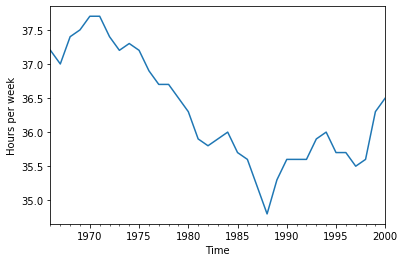

In [50]:
#convert to time series

cadhrs['Date'] = pd.to_datetime(cadhrs.Year, format = '%Y')
hours_ts = pd.Series(cadhrs.Hours.values, index = cadhrs.Date, name = 'workhours')
hours_ts.index = pd.DatetimeIndex(hours_ts.index, freq = hours_ts.index.inferred_freq)
ax = hours_ts.plot()
ax.set_xlabel('Time')
ax.set_ylabel('Hours per week')
plt.show()

In [51]:
#Fit a quadratic model with seasonality to the time series
hours_df = tsatools.add_trend(hours_ts, trend = 'ct')
hours_df

,workhours,const,trend
Date,,,
1966-01-01,37.2,1.0,1.0
1967-01-01,37.0,1.0,2.0
1968-01-01,37.4,1.0,3.0
1969-01-01,37.5,1.0,4.0
1970-01-01,37.7,1.0,5.0
1971-01-01,37.7,1.0,6.0
1972-01-01,37.4,1.0,7.0
1973-01-01,37.2,1.0,8.0
1974-01-01,37.3,1.0,9.0


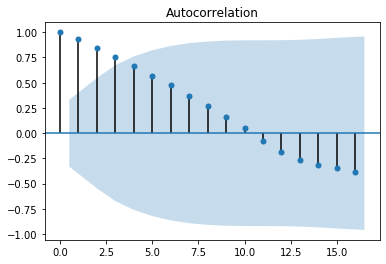

[ 1.          0.92827786  0.83907157  0.75243724  0.66489363  0.5711929
  0.47340041  0.36878832  0.26492963  0.16369487  0.04740503 -0.08222525
 -0.18483692 -0.26088464 -0.31045932 -0.34629088 -0.3809144  -0.4222536
 -0.43949689 -0.43855458 -0.41680275 -0.38853008 -0.35354174 -0.29956243
 -0.25714397 -0.22719563 -0.2070935  -0.17875588 -0.14213083 -0.11126022
 -0.07402466 -0.04542725 -0.01976552  0.00544158  0.00761791]


C:\Users\GETHSEMAN\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


In [52]:
tsaplots.plot_acf(hours_df['1966-01-01':'2000-01-01'].workhours)
plt.show()
print(stattools.acf(hours_df['1966-01-01':'2000-01-01'].workhours))

lag-1 exhibits positive autocorrelation